In [6]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_excel('Обработано.xlsx')

In [12]:
data.groupby('СПУ, есть/нет', as_index=False).agg({'Sum([Всего начислено])':sum, 'Номер карты':'nunique'}).to_excel('Группа.xlsx')

In [18]:
data.groupby(by=['СПУ, есть/нет', 'Номер карты'], as_index=False).agg({'Дата приема':'nunique'}).groupby('СПУ, есть/нет', as_index=False).agg({'Дата приема':sum})

,"СПУ, есть/нет",Дата приема
0,Есть,6845
1,Нет,61206


In [30]:
data_without_spu = data[data['Действующая СПУ на дату приема'] == '-'].reset_index(drop=True)

In [34]:
group_date = data_without_spu.groupby('Номер карты', as_index=False).agg({'Дата приема':['min', 'max', 'nunique']})

In [38]:
group_date

Номер карты Дата приема                   
                          min        max nunique
0       540000006  2018-03-16 2018-10-03       2
1       540000044  2017-09-16 2018-10-16       7
2       540000048  2017-12-03 2019-05-14       4
3       540000065  2017-10-02 2018-05-02       5
4       540000070  2017-09-02 2018-05-17      26
...           ...         ...        ...     ...
22372   940000047  2018-03-02 2020-07-06      15
22373   940000049  2017-11-19 2018-07-26       2
22374   940000054  2017-12-18 2020-07-06       8
22375   940000060  2017-09-07 2018-01-17       4
22376   940000078  2019-01-24 2019-01-24       1

[22377 rows x 4 columns]

In [40]:
def diff_month(df):
    return (df[('Дата приема', 'max')].year - df[('Дата приема', 'min')].year) * 12 + df[('Дата приема', 'max')].month - df[('Дата приема', 'min')].month

In [41]:
group_date['Кол-во месяцев'] = group_date.apply(diff_month, axis=1)

In [45]:
group_date['Регулярность посещений'] = group_date[('Дата приема', 'nunique')] / group_date[('Кол-во месяцев', '')]

In [51]:
group_date[group_date[('Кол-во месяцев', '')] > 0][('Регулярность посещений', '')].mean()

1.622059887440576

In [54]:
data_with_spu = data[data['Действующая СПУ на дату приема'] != '-'].reset_index(drop=True)

group_date_with_spu = data_with_spu.groupby('Номер карты', as_index=False).agg({'Дата приема':['min', 'max', 'nunique']})

group_date_with_spu['Кол-во месяцев'] = group_date_with_spu.apply(diff_month, axis=1)

group_date_with_spu['Регулярность посещений'] = group_date_with_spu[('Дата приема', 'nunique')] / group_date_with_spu[('Кол-во месяцев', '')]

group_date_with_spu[group_date_with_spu[('Кол-во месяцев', '')] > 0][('Регулярность посещений', '')].mean()


1.4660232152446648

In [56]:
data.groupby('СПУ, есть/нет').agg({'Sum([Количество])':sum})

,Sum([Количество])
"СПУ, есть/нет",
Есть,14054
Нет,120531


In [58]:
many_spu = data.groupby('Номер карты').agg({'СПУ, есть/нет':set})

In [61]:
many_spu = many_spu[many_spu['СПУ, есть/нет'].apply(len) > 1]

In [64]:
cards = pd.Series(many_spu.index)

In [65]:
cards

0      540000044
1      540000070
2      540000082
3      540000086
4      540000106
         ...    
512    550002623
513    550002685
514    550002750
515    550002908
516    940000015
Name: Номер карты, Length: 517, dtype: object

In [68]:
new_data = data.merge(cards, on='Номер карты')

In [110]:
import re

In [111]:
pattern = r'\(\d{4}, \d{1,2}, \d{1,2}\)'

In [116]:
temp_dates = []

In [117]:
temp_new_data = new_data.drop_duplicates(subset=['Номер карты', 'Действующая СПУ на дату приема'])



In [118]:
for i in temp_new_data[temp_new_data['СПУ, есть/нет'] == 'Есть']['Сроки действия СПУ'].to_list():
    temp_dates.append(re.search(pattern, i)[0])

In [119]:
temp_dates

new_temp_dates = []

for i in temp_dates:
    new_temp_dates.append(datetime.datetime.strptime(i, '(%Y, %m, %d)'))

In [124]:
sorted(new_temp_dates)[2]

datetime.datetime(2018, 12, 7, 0, 0)

In [109]:
new_data

,Номер карты,Пациент,Пол,Дата рождения,Категория клиента,Год,Месяц,Дата приема,Дата и время посещения,Дата первого посещения,Наименование услуги,Sum([Количество]),Sum([Всего начислено]),Электронный адрес Пациента,Действующая СПУ на дату приема,Сроки действия СПУ,"СПУ, есть/нет"
0,540008687,Биндер Евгений Дмитриевич,Мужской,2007-07-20 00:00:00,НАЛ,2017,сент.,2017-09-01,2017-09-01 18:50:30,2012-03-06,Консультация врача - дерматолога первичная в ...,1,900.0,-,-,-,Нет
1,540008687,Биндер Евгений Дмитриевич,Мужской,2007-07-20 00:00:00,НАЛ,2017,сент.,2017-09-06,2017-09-06 16:59:58,2012-03-06,Консультация врача - дерматолога повторная в а...,1,720.0,-,Скидка 10%,"(datetime.date(2017, 9, 6), datetime.date(2018...",Есть
2,540008687,Биндер Евгений Дмитриевич,Мужской,2007-07-20 00:00:00,НАЛ,2018,февр.,2018-02-04,2018-02-04 10:26:27,2012-03-06,Консультация врача - педиатра первичная в амбу...,1,900.0,-,Скидка 10%,"(datetime.date(2017, 9, 6), datetime.date(2018...",Есть
3,540008687,Биндер Евгений Дмитриевич,Мужской,2007-07-20 00:00:00,НАЛ,2018,июл.,2018-07-06,2018-07-06 12:59:00,2012-03-06,Консультация врача - педиатра первичная в амбу...,1,900.0,-,Скидка 10%,"(datetime.date(2017, 9, 6), datetime.date(2018...",Есть
4,540008687,Биндер Евгений Дмитриевич,Мужской,2007-07-20 00:00:00,НАЛ,2018,нояб.,2018-11-14,2018-11-14 13:25:34,2012-03-06,Консультация врача - педиатра первичная в амбу...,1,1080.0,-,-,-,Нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19111,540053910,Бочкова Татьяна Сергеевна,Женский,1984-02-24 00:00:00,НАЛ,2020,сент.,2020-09-18,2020-09-18 11:27:04,2020-02-03,Консультация врача - дерматолога первичная в ...,1,1302.0,-,Скидка 7%,"(datetime.date(2020, 9, 18), '-')",Есть
19112,540025175,Фисюк Кирилл Дмитриевич,Мужской,2015-07-16 00:00:00,НАЛ,2020,февр.,2020-02-10,2020-02-10 13:00:10,2016-01-20,Консультация врача - педиатра первичная в амбу...,1,1200.0,-,-,-,Нет
19113,540025175,Фисюк Кирилл Дмитриевич,Мужской,2015-07-16 00:00:00,НАЛ,2020,февр.,2020-02-14,2020-02-14 11:46:02,2016-01-20,Консультация врача - педиатра повторная в амбу...,1,950.0,-,Скидка 5%,"(datetime.date(2020, 2, 14), '-')",Есть
19114,540025175,Фисюк Кирилл Дмитриевич,Мужской,2015-07-16 00:00:00,НАЛ,2020,февр.,2020-02-19,2020-02-19 11:08:16,2016-01-20,Консультация врача - педиатра повторная в амбу...,1,950.0,-,Скидка 5%,"(datetime.date(2020, 2, 14), '-')",Есть


In [134]:
new_data.groupby(by=['Номер карты', 'СПУ, есть/нет'], as_index=False).agg({'Sum([Всего начислено])':sum, 'Sum([Количество])':sum}).groupby('СПУ, есть/нет').mean()

,Sum([Всего начислено]),Sum([Количество])
"СПУ, есть/нет",,
Есть,11904.166015,18.324952
Нет,13322.857311,24.512573


In [136]:
new_data

,Номер карты,Пациент,Пол,Дата рождения,Категория клиента,Год,Месяц,Дата приема,Дата и время посещения,Дата первого посещения,Наименование услуги,Sum([Количество]),Sum([Всего начислено]),Электронный адрес Пациента,Действующая СПУ на дату приема,Сроки действия СПУ,"СПУ, есть/нет"
0,540008687,Биндер Евгений Дмитриевич,Мужской,2007-07-20 00:00:00,НАЛ,2017,сент.,2017-09-01,2017-09-01 18:50:30,2012-03-06,Консультация врача - дерматолога первичная в ...,1,900.0,-,-,-,Нет
1,540008687,Биндер Евгений Дмитриевич,Мужской,2007-07-20 00:00:00,НАЛ,2017,сент.,2017-09-06,2017-09-06 16:59:58,2012-03-06,Консультация врача - дерматолога повторная в а...,1,720.0,-,Скидка 10%,"(datetime.date(2017, 9, 6), datetime.date(2018...",Есть
2,540008687,Биндер Евгений Дмитриевич,Мужской,2007-07-20 00:00:00,НАЛ,2018,февр.,2018-02-04,2018-02-04 10:26:27,2012-03-06,Консультация врача - педиатра первичная в амбу...,1,900.0,-,Скидка 10%,"(datetime.date(2017, 9, 6), datetime.date(2018...",Есть
3,540008687,Биндер Евгений Дмитриевич,Мужской,2007-07-20 00:00:00,НАЛ,2018,июл.,2018-07-06,2018-07-06 12:59:00,2012-03-06,Консультация врача - педиатра первичная в амбу...,1,900.0,-,Скидка 10%,"(datetime.date(2017, 9, 6), datetime.date(2018...",Есть
4,540008687,Биндер Евгений Дмитриевич,Мужской,2007-07-20 00:00:00,НАЛ,2018,нояб.,2018-11-14,2018-11-14 13:25:34,2012-03-06,Консультация врача - педиатра первичная в амбу...,1,1080.0,-,-,-,Нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19111,540053910,Бочкова Татьяна Сергеевна,Женский,1984-02-24 00:00:00,НАЛ,2020,сент.,2020-09-18,2020-09-18 11:27:04,2020-02-03,Консультация врача - дерматолога первичная в ...,1,1302.0,-,Скидка 7%,"(datetime.date(2020, 9, 18), '-')",Есть
19112,540025175,Фисюк Кирилл Дмитриевич,Мужской,2015-07-16 00:00:00,НАЛ,2020,февр.,2020-02-10,2020-02-10 13:00:10,2016-01-20,Консультация врача - педиатра первичная в амбу...,1,1200.0,-,-,-,Нет
19113,540025175,Фисюк Кирилл Дмитриевич,Мужской,2015-07-16 00:00:00,НАЛ,2020,февр.,2020-02-14,2020-02-14 11:46:02,2016-01-20,Консультация врача - педиатра повторная в амбу...,1,950.0,-,Скидка 5%,"(datetime.date(2020, 2, 14), '-')",Есть
19114,540025175,Фисюк Кирилл Дмитриевич,Мужской,2015-07-16 00:00:00,НАЛ,2020,февр.,2020-02-19,2020-02-19 11:08:16,2016-01-20,Консультация врача - педиатра повторная в амбу...,1,950.0,-,Скидка 5%,"(datetime.date(2020, 2, 14), '-')",Есть


In [148]:
pattern = r'\(\d{4}, \d{1,2}, \d{1,2}\)'

temp_dates = []

In [149]:
for i in new_data['Сроки действия СПУ'].to_list():
    if i == '-':
        temp_dates.append('-')
    else:    
        temp_dates.append(re.search(pattern, i)[0])

In [150]:
new_temp_dates = []

for i in temp_dates:
    if i == '-':
        new_temp_dates.append('-')
    else:
        new_temp_dates.append(datetime.datetime.strptime(i, '(%Y, %m, %d)'))

In [151]:
new_temp_dates

['-',
 datetime.datetime(2017, 9, 6, 0, 0),
 datetime.datetime(2017, 9, 6, 0, 0),
 datetime.datetime(2017, 9, 6, 0, 0),
 '-',
 datetime.datetime(2019, 2, 12, 0, 0),
 datetime.datetime(2019, 2, 12, 0, 0),
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 datetime.datetime(2018, 7, 20, 0, 0),
 datetime.datetime(2018, 7, 20, 0, 0),
 datetime.datetime(2018, 7, 20, 0, 0),
 datetime.datetime(2018, 7, 20, 0, 0),
 datetime.datetime(2018, 7, 20, 0, 0),
 datetime.datetime(2018, 7, 20, 0, 0),
 datetime.datetime(2018, 7, 20, 0, 0),
 datetime.datetime(2018, 7, 20, 0, 0),
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 datetime.datetime(2017, 9, 29, 0, 0),
 datetime.datetime(2017, 9, 29, 0, 0),
 datetime.datetime(2017, 9, 29, 0, 0),
 datetime.datetime(2017, 9, 29, 0, 0),
 datetime.datetime(2017, 9, 29, 0, 0),
 datetime.datetime(2017, 9, 29, 0, 0),
 datetime.datetime(2017, 9, 29, 0, 0),
 datetime.datetime(2017, 9, 29, 0, 0),
 '-',
 '-',
 '-',
 '-'

In [152]:
new_data['Дата начала СПУ'] = new_temp_dates

In [155]:
def make_date(x):
    try:
        x = x.date()
        return x
    except:
        return x

new_data['Дата первого посещения'] = new_data['Дата первого посещения'].apply(make_date)

In [157]:
new_data['Дата первого посещения за период'] = new_data['Дата первого посещения'].apply(lambda x: datetime.date(2017, 9, 1) if x < datetime.date(2017, 9, 1) else x)

In [168]:
check_spu = new_data[new_data['СПУ, есть/нет'] == 'Есть'].groupby(by=['Номер карты', 'Дата начала СПУ'], as_index=False).agg({'Пол':'count'})[['Номер карты', 'Дата начала СПУ']]\
.merge(new_data[new_data['СПУ, есть/нет'] == 'Есть'].groupby(by=['Номер карты', 'Дата первого посещения за период'], as_index=False).agg({'Пол':'count'})[['Номер карты', 'Дата первого посещения за период']])

,Номер карты,Дата начала СПУ,Дата первого посещения за период
0,540000044,2018-10-24,2017-09-01
1,540000070,2018-07-05,2017-09-01
2,540000082,2017-11-04,2017-09-01
3,540000086,2019-02-17,2017-09-01
4,540000106,2018-12-10,2017-09-01
...,...,...,...
558,550002623,2020-04-09,2019-03-04
559,550002685,2019-11-14,2019-04-13
560,550002750,2019-07-10,2019-06-15
561,550002908,2020-05-19,2019-10-11


In [170]:
end = datetime.date(2020, 9, 27)

In [180]:
check_spu['Срединная дата'] = ((end - check_spu['Дата первого посещения за период'])/2).apply(lambda x: x.days)

In [186]:
check_spu['Срединная дата'] = check_spu['Срединная дата'].apply(datetime.timedelta)

In [188]:
check_spu['Дата по середине'] = check_spu['Дата первого посещения за период'] + check_spu['Срединная дата']

C:\Users\AmanovRA\Anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1215: PerformanceWarning: Adding/subtracting array of DateOffsets to TimedeltaArray not vectorized
  PerformanceWarning,


In [220]:
determ = datetime.timedelta(days=30)

In [223]:
check_spu['Дата по середине2'] = check_spu['Дата по середине'].apply(pd.Timestamp)

In [221]:
check_spu['Период'] = check_spu['Дата по середине2'].apply(lambda x: pd.date_range(x - determ, x + determ))

In [222]:
check_spu['Дата начала СПУ2'] = check_spu['Дата начала СПУ'].apply(pd.Timestamp)

In [224]:
temp_array = []

for i in check_spu.index:
    temp_array.append(check_spu['Дата начала СПУ2'][i] in check_spu['Период'][i])

In [225]:
check_spu['Клиенты прошли проверку'] = temp_array

In [228]:
cliens_second_part = check_spu[check_spu['Клиенты прошли проверку']==True]['Номер карты'].reset_index(drop=True)

In [229]:
cliens_second_part

0     540000086
1     540017677
2     540021001
3     540023233
4     540027512
5     540032972
6     540034969
7     540035602
8     540036216
9     540036255
10    540037337
11    540038808
12    540039227
13    540039406
14    540045605
15    540048738
16    550000256
17    550001689
18    550002057
19    550002110
Name: Номер карты, dtype: object

In [235]:
end_part = new_data.merge(cliens_second_part)

In [237]:
group_end_part = end_part.groupby('СПУ, есть/нет').agg({'Sum([Всего начислено])':sum, 'Sum([Количество])':sum, 'Номер карты':'nunique'})

In [239]:
group_end_part.to_excel('посл.xlsx')

In [245]:
end_part.groupby(by=['СПУ, есть/нет', 'Номер карты'], as_index=False).agg({'Дата приема':'nunique'}).groupby('СПУ, есть/нет').agg({'Дата приема':['sum', 'mean']})

Дата приема       
                      sum   mean
СПУ, есть/нет                   
Есть                  271  13.55
Нет                   301  15.05

In [248]:
cliens_second_part

0     540000086
1     540017677
2     540021001
3     540023233
4     540027512
5     540032972
6     540034969
7     540035602
8     540036216
9     540036255
10    540037337
11    540038808
12    540039227
13    540039406
14    540045605
15    540048738
16    550000256
17    550001689
18    550002057
19    550002110
Name: Номер карты, dtype: object

In [251]:
posesch = end_part.groupby(by=['СПУ, есть/нет', 'Номер карты'], as_index=False).agg({'Дата приема':['min', 'max', 'nunique']})

In [253]:
def diff_month(df):
    return (df[('Дата приема', 'max')].year - df[('Дата приема', 'min')].year) * 12 + df[('Дата приема', 'max')].month - df[('Дата приема', 'min')].month

posesch['Месяцев'] = posesch.apply(diff_month, axis=1)

In [256]:
posesch =  posesch[posesch[('Месяцев', '')]>0]

In [258]:
posesch['Посещ в месяц'] = posesch[('Дата приема', 'nunique')] / posesch[('Месяцев', '')]

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [260]:
posesch.groupby(('СПУ, есть/нет', '')).agg({('Посещ в месяц', ''):'mean'})

,Посещ в месяц
,
"(СПУ, есть/нет, )",
Есть,1.567028
Нет,2.054687


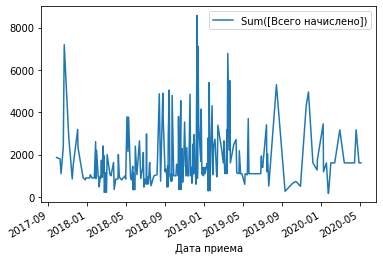

In [270]:
end_part[end_part['СПУ, есть/нет']=='Нет'].groupby('Дата приема').agg({'Sum([Всего начислено])':sum}).plot()

In [272]:
end_part.to_excel('end_part.xlsx')

In [277]:
s = end_part[end_part['СПУ, есть/нет']=='Нет'].groupby('Дата приема', as_index=False).agg({'Sum([Всего начислено])':sum})

In [280]:
s['Дата приема'] = s['Дата приема'].dt.to_period('M')

In [285]:
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

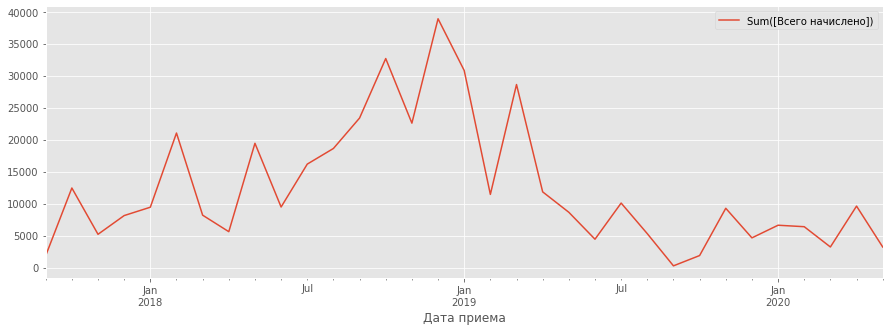

In [286]:
s.groupby('Дата приема').sum().plot()

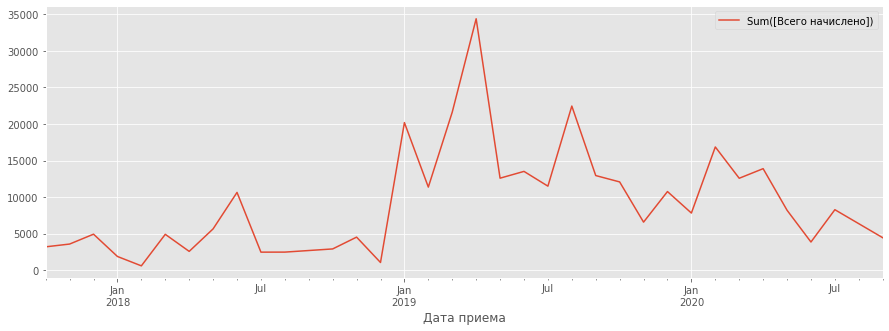

In [287]:
b = end_part[end_part['СПУ, есть/нет']=='Есть'].groupby('Дата приема', as_index=False).agg({'Sum([Всего начислено])':sum})
b['Дата приема'] = b['Дата приема'].dt.to_period('M')
b.groupby('Дата приема').sum().plot()

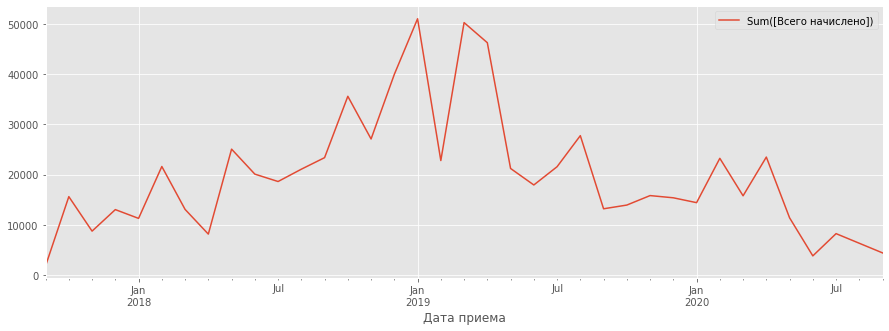

In [288]:
x = end_part.groupby('Дата приема', as_index=False).agg({'Sum([Всего начислено])':sum})
x['Дата приема'] = x['Дата приема'].dt.to_period('M')
x.groupby('Дата приема').sum().plot()